In [1]:
using DelimitedFiles

In [2]:
pk = readdlm("../data/test_pk.txt")
pksmooth = readdlm("../data/test_smooth_pk.txt");

In [3]:
using DelimitedFiles
using Plots
include("../src/utils.jl")
include("../src/bispectrum_multipoles.jl")
include("../src/TreeLevelBispectrum.jl")
include("../src/power_spectrum.jl")

init_linear_pk (generic function with 1 method)

In [4]:
pk = readdlm("../data/test_pk.txt");
pksmooth = readdlm("../data/test_smooth_pk_lowk.txt");

In [5]:
kkk = kkk_grid(0.005, 0.01, 30);

In [6]:
pkfunc = init_linear_pk("../data/test_pk.txt");
pksmoothfunc = init_linear_pk("../data/test_smooth_pk_lowk.txt");

In [7]:
Btest = zeros(2600)
Bsmooth = zeros(2600)
for i in 1:2600
    Btest[i] = B00(kkk[1,i],kkk[2,i],kkk[3,i],2,0.3,0.7,pkfunc,tree_level_bk)
    Bsmooth[i] = B00(kkk[1,i],kkk[2,i],kkk[3,i],2,0.3,0.7,pksmoothfunc,tree_level_bk)
end
Bbao = zeros(4,2600)
for i in 1:2600
    Bbao[1,i] = kkk[1,i]
    Bbao[2,i] = kkk[2,i]
    Bbao[3,i] = kkk[3,i]
    Bbao[4,i] = Btest[i]/Bsmooth[i]
end

In [8]:
writedlm("../data/BK_bao_only.txt", Bbao)

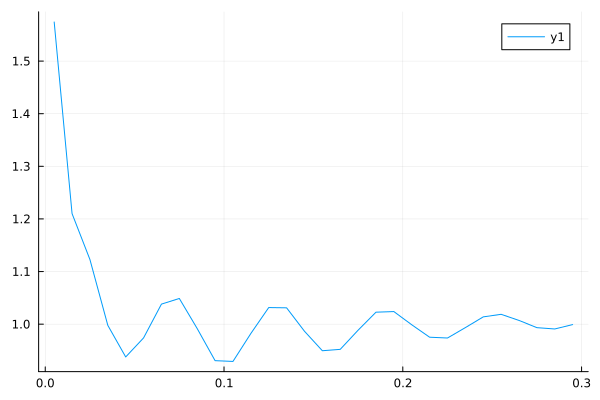

In [19]:
kk = unique(kkk[1,:])
Pbao = pkfunc(kk)./pksmoothfunc(kk)
plot(kk, Pbao)

In [20]:
writedlm("../data/Pk_bao_only.txt", Pbao)